# 欢迎来到notebook_hub

由于作者不习惯官方镜像jupyterlab的使用，所以基于ubuntu的基础镜像制作了这个jupyter notebook的docker镜像。

该镜像整合了python3，R语言，Nbextensions等插件并对jupyter notebook进行了优化处理。

github项目地址：https://github.com/brokyz/jupyter_notebook_for_docker

dockerhub项目地址：https://registry.hub.docker.com/r/brokyz/notebook_hub

## 优化内容
- 优化jupyter notebook的UI显示。
- 优化jupyter notebook对中文的支持。
- 优化了部分包对中文字体的显示乱码问题。
- 为jupyter notebook添加了Nbextensions功能增强插件。
- 为jupyter notebook整合了python3和R的内核支持。

## 搭建

### 拉取镜像
```
docker pull brokyz/notebook_hub
```
### 部署镜像
```
docker run -d -p 8889:8888 --name=notebook_hub --restart=always brokyz/notebook_hub
# 如果存在端口冲突，请修改端口。比如想要通过ip:9999访问，则需要改成-p 9999:8888
```
### 登录并查看镜像部署日志获取token
```
docker logs notebook_hub
# 结果如下，token为1294c0bfc1513e9f2250df2ad52d40eb40b1ab678341e563
--------------------------------------------------------------------------------------------------------------------------------------------------
    To access the notebook, open this file in a browser:
        file:///root/.local/share/jupyter/runtime/nbserver-8-open.html
    Or copy and paste one of these URLs:
        http://b1c5c1eb1901:8888/?token=1294c0bfc1513e9f2250df2ad52d40eb40b1ab678341e563
     or http://127.0.0.1:8888/?token=1294c0bfc1513e9f2250df2ad52d40eb40b1ab678341e563
```
在浏览器输入 本机ip:8889 

输入获得的token，并设置自己的登陆密码

登陆密码设置后，需要重启容器才可以生效
```
docker restart notebook_hub
```
之后仅需要通过 ip:8887 就可以访问了

## 使用

### 相关信息
- jupyter notebook的相关配置文件位于`/root/.jupyter`目录
- jupyter notebook的工作目录位于`/root/notebook`目录

### 修改工作目录

修改配置文件/root/.jupyter/jupyter_notebook_config.py工作目录配置
```
c.NotebookApp.notebook_dir = '/root/notebook'
```
### 安装python包

在jupyter notebook中，可以在notebook的代码块中运行以下命令安装python包

In [1]:
!pip install numpy pandas matplotlib yapf autopep8

在终端下直接使用`pip`安装即可

### 安装R包

在jupyter notebook中，可以在r内核的notebook的代码块中运行以下命令安装R包
```
install.packages('formatR')
```

In [2]:
!Rscript -e "install.packages(c('formatR', 'jsonlite'))"

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 
5: Setting LC_PAPER failed, using "C" 
6: Setting LC_MEASUREMENT failed, using "C" 
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/formatR_1.12.tar.gz'
Content type 'application/x-gzip' length 95944 bytes (93 KB)
downloaded 93 KB

trying URL 'https://cloud.r-project.org/src/contrib/jsonlite_1.8.0.tar.gz'
Content type 'application/x-gzip' length 1051625 bytes (1.0 MB)
downloaded 1.0 MB

During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
4: Setting LC_PAPER failed, using "C" 
5: Setting LC_MEASUREMENT failed, using "C" 
* installing *source* package ‘formatR’ ...
** package ‘formatR’ successfully unpack

在终端中可以使用以下代码安装R包
```
Rscript -e "install.packages('formatR')"
```


### 修改相关字体大小，行间距等UI信息

修改用户自定义css文件/root/.jupyter/custom/custom.css

默认优化后的配置为
```
/* Body */
/* #notebook-container {
    width: 90%
} */

/* Markdown */
div#notebook {
    font-family: san francisco, "PingFangSC-Medium", "Microsoft YaHei";
    line-height: 20px;
    -webkit-font-smoothing: antialiased !important;
}

/* Markdown - h2 */
div#notebook h2 {
    color: #007aff;
}

/* Markdown - quote */
div#notebook blockquote{
    background-color: #f8f8f8;
    color: #505050;
    padding: 8.5px;
    margin: 0.5em -0.5em 0.5em -0.4em;
}

/* Markdown - code in paragraph */
div#notebook p code, div#notebook li code {
    font-family: Consolas, "PingFangSC-Medium", "Microsoft YaHei";
    font-size: 1em !important;
    color: #111111;
    border: 0.5px solid #cfcfcf;
    border-radius: 2px;
    background-color: #f7f7f7;
    padding: .1em .2em;
    margin: 0px 2px;
}

/* Markdown - code */
div.text_cell_render pre {
    border: 1px solid #cfcfcf;
    border-radius: 2px;
    background: #f7f7f7;
    line-height: 1.21429em;
    padding: 8.5px;
    margin: 0.5em -0.5em 0.5em -0.4em;
}
div.text_cell_render code {
    background: #f7f7f7;
}

/* Code */
div.CodeMirror-code {
    font-family: Consolas, "PingFangSC-Medium", "Microsoft YaHei";
    font-size: 11pt;
    line-height: 140%;
    -webkit-font-smoothing: antialiased !important;
}

/* Code - output */
div.output pre {
    font-family: Consolas, "PingFangSC-Medium", "Microsoft YaHei";
    line-height: 20px;
    -webkit-font-smoothing: antialiased !important;
}

/* Code - comment */
span.cm-comment {
    font-family: san francisco, "PingFangSC-Medium", "Microsoft YaHei" !important;
    font-style: normal !important;
}
```

### 添加matplotlib显示字体

这里自带了`SimHei`字体，可以使用以下代码来添加SimHei字体
```
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
```
如果需要其他字体，需要将字体包移动到`/usr/share/fonts`目录下，重启docker容器后生效

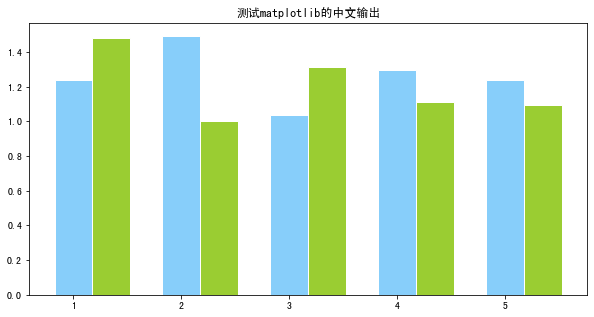

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10, 5))
x = np.arange(1, 6)
Y1 = np.random.uniform(1.5, 1.0, 5)
Y2 = np.random.uniform(1.5, 1.0, 5)
plt.bar(x, Y1, width=0.35, facecolor='lightskyblue', edgecolor='white')
plt.bar(x + 0.35, Y2, width=0.35, facecolor='yellowgreen', edgecolor='white')
plt.title('测试matplotlib的中文输出')
plt.show()